In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import brentq

In [2]:
matplotlib.rc("text", usetex=True)
matplotlib.rc("font", family="serif")
matplotlib.style.use("dark_background")

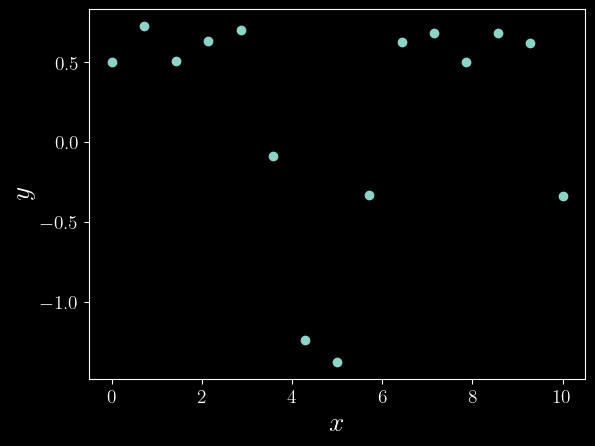

In [3]:
xvals = np.linspace(0, 10, num=15)
yvals = np.sin(xvals) + 0.5 * np.cos(2 * xvals)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("sample_data.pdf", bbox_inches="tight", transparent=True)

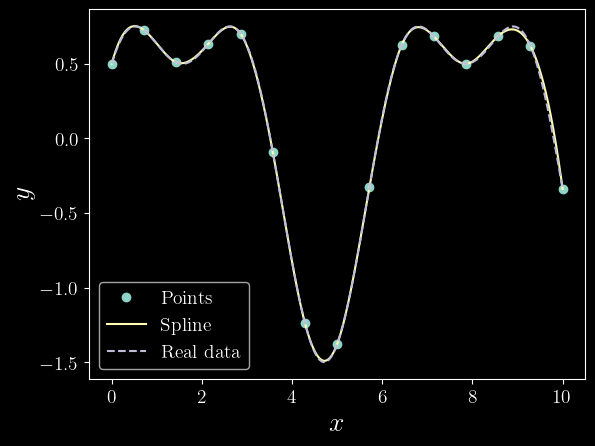

In [7]:
# cubic spline interpolation
tck = interpolate.splrep(xvals, yvals, s=0)

xinterp = np.linspace(0, 10, num=1000)
yinterp = interpolate.splev(xinterp, tck, der=0)

def f(x):
    return np.sin(x) + 0.5 * np.cos(2 * x)

yreal = f(xinterp)

fig = plt.figure()
ax = plt.gca()
ax.plot(xvals, yvals, linestyle="", marker="o", label="Points")
ax.plot(xinterp, yinterp, linestyle="-", marker="", label="Spline")
ax.plot(xinterp, yreal, linestyle="--", marker="", label="Real data")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)
leg = ax.legend(loc=0, prop={"size": 14})

fig.savefig("spline_interp.pdf", bbox_inches="tight", transparent=True)

In [9]:
# find where my spline above is equal to 0
a = 2
b = 4

def wrapper(x):
    return interpolate.splev(x, tck, der=0)

z1 = brentq(wrapper, a, b)

In [10]:
print(z1)

3.5153406940313134


In [11]:
a = 4
b = 7

z2 = brentq(wrapper, a, b)

In [12]:
a = 7
b = 10

z3 = brentq(wrapper, a, b)

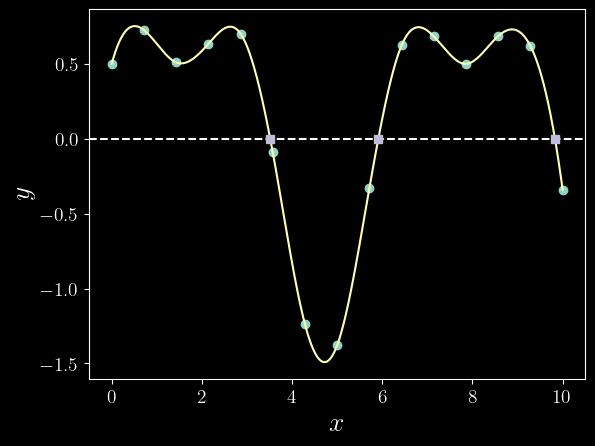

In [13]:
fig = plt.figure()
ax = plt.gca()
ax.axhline(y=0.0, linestyle="--", color="w")
ax.plot(xvals, yvals, linestyle="", marker="o")
ax.plot(xinterp, yinterp, linestyle="-", marker="")
ax.plot([z1, z2, z3], [0, 0, 0], linestyle="", marker="s")
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.tick_params(axis="both", labelsize=14)

fig.savefig("zero_finding.pdf", bbox_inches="tight", transparent=True)

In [14]:
# comparison with actual function!
def f(x):
    return np.sin(x) + 0.5 * np.cos(2 * x)

a = 2
b = 4
zr1 = brentq(f, a, b)

a = 4
b = 7
zr2 = brentq(f, a, b)

a = 7
b = 10
zr3 = brentq(f, a, b)

# compute difference
print("First difference: ", z1 - zr1)
print("Second difference: ", z2 - zr2)
print("Third difference: ", z3 - zr3)

First difference:  -0.0009863922672184167
Second difference:  0.003776175018372463
Third difference:  0.030150549561135165
